In [1]:
import pandas as pd 
from sklearn.impute import SimpleImputer
import numpy as np 

train_data=pd.read_csv('/Users/ypi/Desktop/archive/ml_case_training_data.csv')
train_out=pd.read_csv('/Users/ypi/Desktop/archive/ml_case_training_output.csv')
train_hist=pd.read_csv('/Users/ypi/Desktop/archive/ml_case_training_hist_data.csv')

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [3]:
train_data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [4]:
## Merge two data set

full_train = pd.merge(train_data,train_out, how='inner',left_on='id',right_on='id')
full_train.to_csv("/Users/ypi/Desktop/archive/full_data.csv")

In [5]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [6]:
train_hist.isnull().sum()/train_hist.shape[0]

id              0.000000
price_date      0.000000
price_p1_var    0.007041
price_p2_var    0.007041
price_p3_var    0.007041
price_p1_fix    0.007041
price_p2_fix    0.007041
price_p3_fix    0.007041
dtype: float64

In [6]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train_hist[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']]=imp_mean.fit_transform(
    train_hist[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']])




In [7]:
train_hist['price_p1']=train_hist['price_p1_var']+train_hist['price_p1_fix']
train_hist['price_p2']=train_hist['price_p2_var']+train_hist['price_p2_fix']
train_hist['price_p3']=train_hist['price_p3_var']+train_hist['price_p3_fix']

In [8]:
full_train=full_train.merge(train_hist, on='id',how='inner')

In [9]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        193002 non-null  object 
 1   activity_new              78570 non-null   object 
 2   campaign_disc_ele         0 non-null       float64
 3   channel_sales             142407 non-null  object 
 4   cons_12m                  193002 non-null  int64  
 5   cons_gas_12m              193002 non-null  int64  
 6   cons_last_month           193002 non-null  int64  
 7   date_activ                193002 non-null  object 
 8   date_end                  192981 non-null  object 
 9   date_first_activ          42042 non-null   object 
 10  date_modif_prod           191127 non-null  object 
 11  date_renewal              192525 non-null  object 
 12  forecast_base_bill_ele    42042 non-null   float64
 13  forecast_base_bill_year   42042 non-null   f

In [10]:
full_train.shape

(193002, 43)

In [11]:
full_train.drop_duplicates(subset ="id",
                     keep = 'first', inplace = True)

In [12]:
full_train.shape

(16096, 43)

/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Percent missing data by feature'}, xlabel='Features', ylabel='Percent of missing values'>

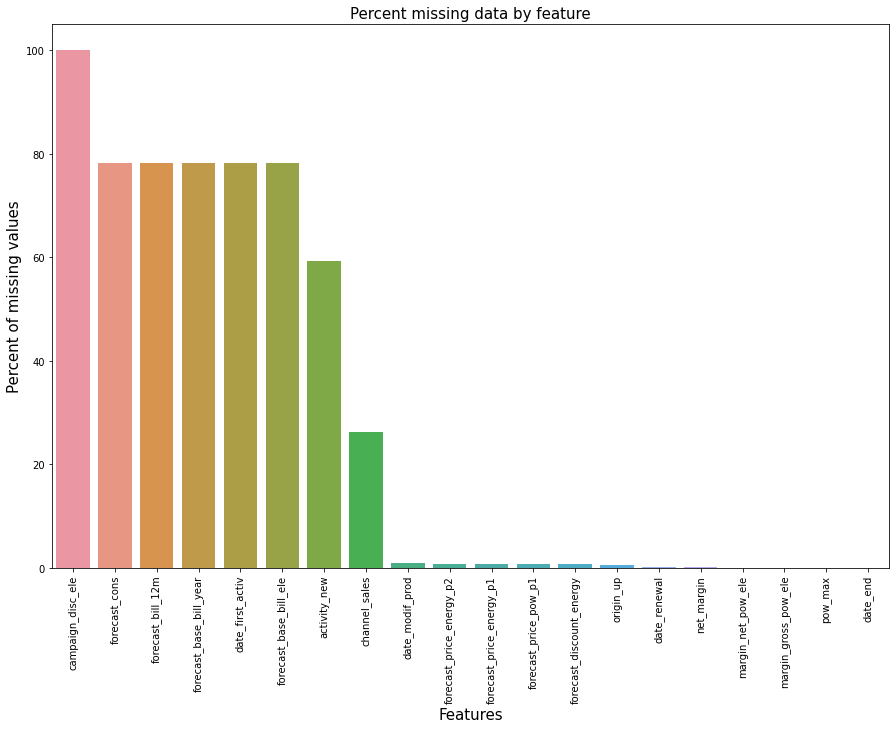

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

nan_count=((full_train.isna().sum()/full_train.shape[0])*100).sort_values(ascending=False)
nan_count=nan_count[nan_count>0]
           
plt.figure(figsize=(15,10))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(nan_count.index, nan_count.values)

In [14]:
### drop variable with too many missing variables 

full_train.drop(nan_count.index[:7],axis =1,inplace= True)


In [15]:
## fill category na

full_train['channel_sales']=full_train['channel_sales'].fillna('Unknown Sale Channel')

In [16]:
full_train.isnull().sum()

id                            0
channel_sales                 0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      2
date_modif_prod             157
date_renewal                 40
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    126
forecast_meter_rent_12m       0
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
has_gas                       0
imp_cons                      0
margin_gross_pow_ele         13
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
origin_up                    87
pow_max                       3
churn                         0
price_date                    0
price_p1_var                  0
price_p2_var                  0
price_p3_var                  0
price_p1_fix                  0
price_p2

In [17]:
full_train.sort_values(by=['net_margin'],ascending=False)[['net_margin','id','churn']].head(20)

,net_margin,id,churn
34446,24570.65,fb7dcb0f4e0dc4ee54874eab2607c4da,1
141825,10203.50,d00e8a9951b5551d8f02e45f9ed2b0dd,0
85511,5625.14,78bd1c5c0c67f2be6de89b19df5f8861,0
163339,4346.37,818b8bca0a9d7668252d46b978169325,0
103278,4305.79,a3a739686fbd5ba8b4a21ec835507b6d,0
3992,4161.74,89b3406c3ba717f1b788ceeb5af9e8b9,0
148303,4040.60,4519e6a8928a015819466fc9de0fa49e,0
51035,3768.16,e8948a5469344e9ad0dfcacbb705f709,1
79083,3744.72,933527d7a2f669af49075a2380c10ded,0
84515,3716.78,43580ef6cc40fcfd0a9b76eee17a267a,0


In [19]:
full_train[['date_modif_prod','date_renewal','date_end']] = full_train[['date_modif_prod','date_renewal','date_end']].fillna(method = 'bfill')

In [20]:
full_train.isnull().sum()

id                            0
channel_sales                 0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      0
date_modif_prod               0
date_renewal                  0
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    126
forecast_meter_rent_12m       0
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
has_gas                       0
imp_cons                      0
margin_gross_pow_ele         13
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
origin_up                    87
pow_max                       3
churn                         0
price_date                    0
price_p1_var                  0
price_p2_var                  0
price_p3_var                  0
price_p1_fix                  0
price_p2

In [21]:
#### from sklearn.impute import SimpleImputer

from sklearn.impute import SimpleImputer
import numpy as np 

freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
full_train[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
         'forecast_price_pow_p1', 'origin_up']]= freq.fit_transform (full_train[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
         'forecast_price_pow_p1', 'origin_up']])

In [22]:
full_train.to_csv("/Users/ypi/Desktop/archive/full_data.csv")

In [23]:
full_train.fillna(0,inplace = True)
full_train.isnull().sum()

id                          0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
churn                       0
price_date                  0
price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
price_p1  

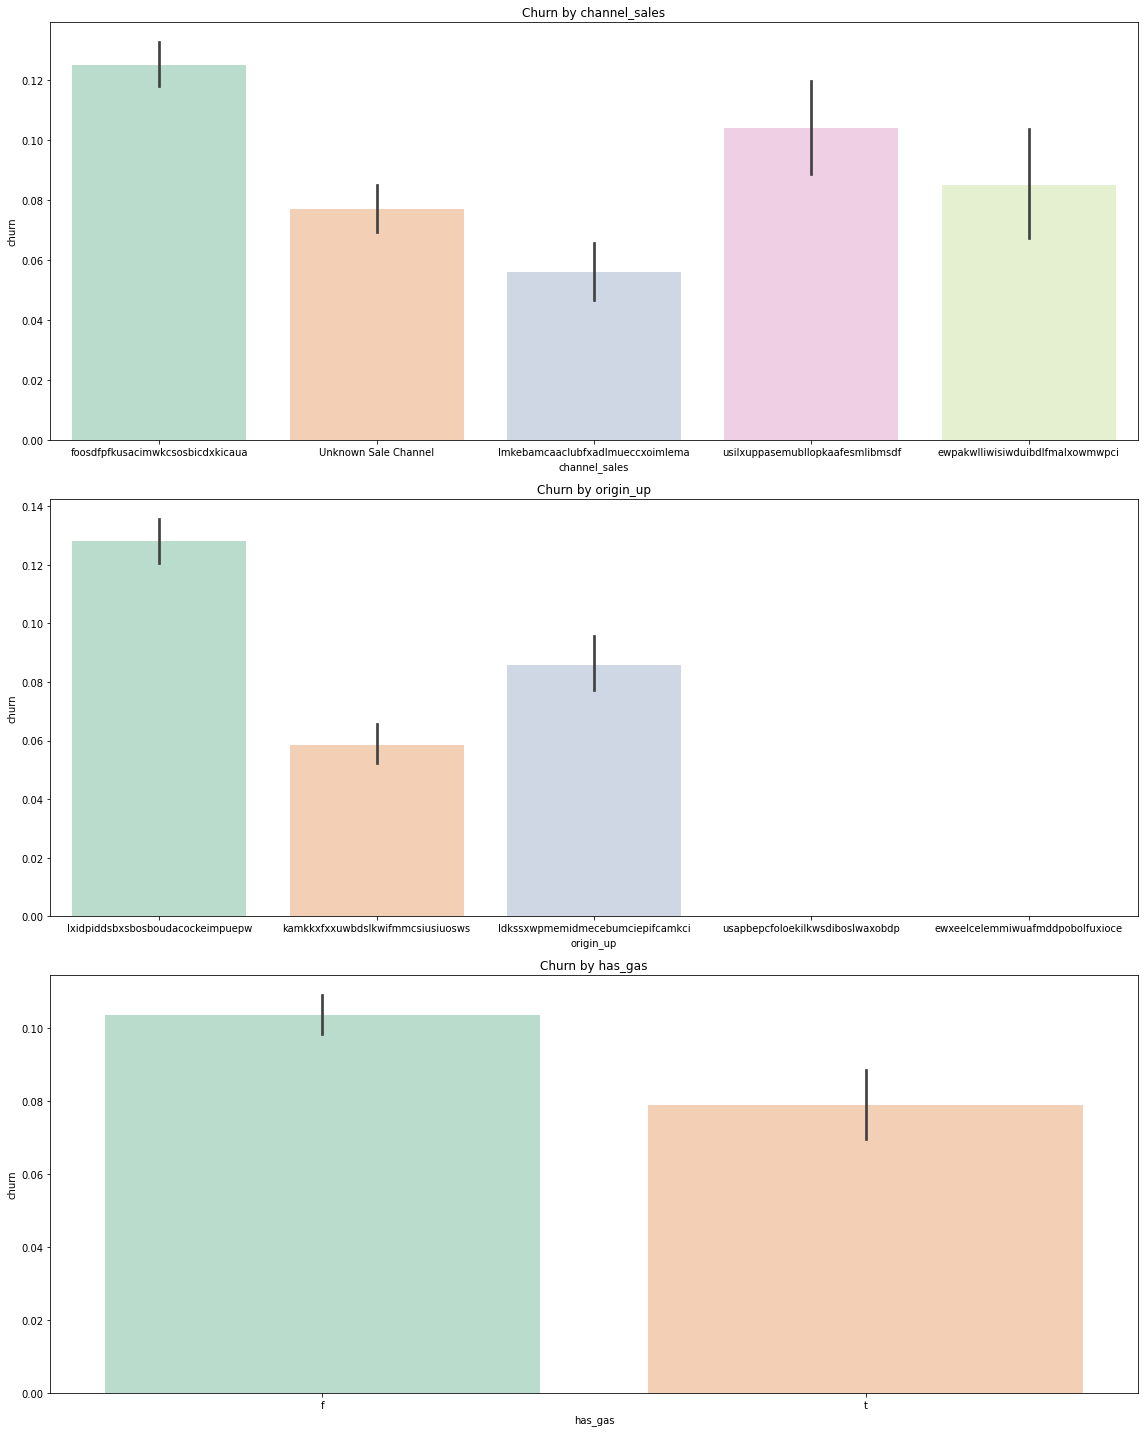

In [24]:
var = ["channel_sales","origin_up","has_gas"]

fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,20))
for i, item in enumerate(var):
    plt.subplot(3,1,(i+1))
    ax=sns.barplot(x=item,y="churn",data=full_train,palette="Pastel2",
                   order=full_train.value_counts(full_train[item]).iloc[:5].index)
    plt.xlabel(str(item))
    plt.title("Churn by "+ str(item))
    plt.tight_layout()
    i=i+1
plt.show()



In [25]:
full_train.sort_values(by='net_margin')[['id','net_margin']].head(10)

,id,net_margin
124642,93435ecb05910c7b87e0ae9dbedb2882,-4148.99
117867,b4c9d3087133ee1619884ea047b57fe5,-3945.71
11761,d415b04fd1ff9ab286dd1cac3a6623d6,-3711.40
68722,28281f15795638e25be3221aa130a25a,-2587.54
58567,3dc6990cb541343b0b99dfe86a55b5a2,-2554.67
191491,94d5b342b70c0498becd0c7ec67f3888,-2031.15
135346,60de7fe7dfcbd7a875c7c573b7cbb284,-1523.39
122414,a615160fe993a7304989bb6706b380fb,-1216.80
47717,67d98666d957154f626b5cd46dee7dd1,-1089.63
114952,449f8125b2cb3614f1d756f63d08213f,-931.97


In [26]:
### correlation 


full_train.drop(labels = ["id",'date_activ','date_end','date_modif_prod','date_renewal'],axis = 1,inplace=True)

# 使用one-hot编码
train_dummies = pd.get_dummies(full_train.iloc[:,1:])
train_dummies.head()






,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,price_date_2015-01-01,price_date_2015-02-01,price_date_2015-03-01,price_date_2015-04-01,price_date_2015-05-01,price_date_2015-06-01
0,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,...,0,1,0,0,1,0,0,0,0,0
12,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,0,0,1,0,1,0,0,0,0,0
24,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,1,0,0,0,1,0,0,0,0,0
36,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,1,0,0,0,1,0,0,0,0,0
48,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,1,0,0,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Correlations between Churn and variables')

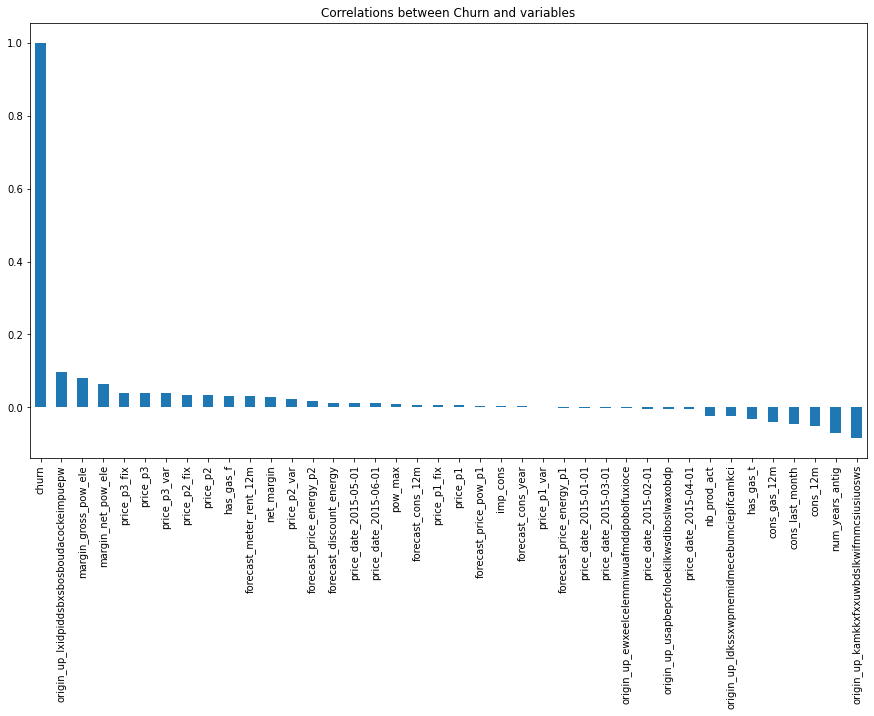

In [27]:
plt.figure(figsize=(15,8))
train_dummies.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
plt.title("Correlations between Churn and variables")



In [28]:
# come back if model performance is bad 

# full_train.drop("forecast_price_energy_p1",axis=1, inplace=True)


In [29]:
## encode category 
def uni(columnlabel):
    print(columnlabel,"--" ,full_train[columnlabel].unique())  # unique函数去除其中重复的元素，返回唯一值
    
trainobject=full_train.select_dtypes(['object'])

for i in range(0,len(trainobject.columns)):
    uni(trainobject.columns[i])

    
# difference labelencode 和 one-hot的区别
# def labelencode(columnlabel):
#     full_train[columnlabel] = LabelEncoder().fit_transform(full_train[columnlabel])
    
# for i in range(0,len(trainobject.columns)):
#     labelencode(trainobject.columns[i])
    
# for i in range(0,len(trainobject.columns)):
#     uni(trainobject.columns[i])

channel_sales -- ['lmkebamcaaclubfxadlmueccxoimlema' 'foosdfpfkusacimwkcsosbicdxkicaua'
 'Unknown Sale Channel' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']
has_gas -- ['f' 't']
origin_up -- ['ldkssxwpmemidmecebumciepifcamkci' 'lxidpiddsbxsbosboudacockeimpuepw'
 'kamkkxfxxuwbdslkwifmmcsiusiuosws' 'usapbepcfoloekilkwsdiboslwaxobdp'
 'ewxeelcelemmiwuafmddpobolfuxioce']
price_date -- ['2015-01-01' '2015-04-01' '2015-02-01' '2015-06-01' '2015-03-01'
 '2015-05-01']


In [30]:
full_train.drop('price_date',axis=1,inplace=True)

In [31]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 192990
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   channel_sales             16096 non-null  object 
 1   cons_12m                  16096 non-null  int64  
 2   cons_gas_12m              16096 non-null  int64  
 3   cons_last_month           16096 non-null  int64  
 4   forecast_cons_12m         16096 non-null  float64
 5   forecast_cons_year        16096 non-null  int64  
 6   forecast_discount_energy  16096 non-null  float64
 7   forecast_meter_rent_12m   16096 non-null  float64
 8   forecast_price_energy_p1  16096 non-null  float64
 9   forecast_price_energy_p2  16096 non-null  float64
 10  forecast_price_pow_p1     16096 non-null  float64
 11  has_gas                   16096 non-null  object 
 12  imp_cons                  16096 non-null  float64
 13  margin_gross_pow_ele      16096 non-null  float64
 14  margi

In [32]:
train_dummies.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,price_date_2015-01-01,price_date_2015-02-01,price_date_2015-03-01,price_date_2015-04-01,price_date_2015-05-01,price_date_2015-06-01
0,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,...,0,1,0,0,1,0,0,0,0,0
12,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,0,0,1,0,1,0,0,0,0,0
24,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,1,0,0,0,1,0,0,0,0,0
36,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,1,0,0,0,1,0,0,0,0,0
48,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,1,0,0,0,1,0,0,0,0,0


In [33]:
### model 

y=train_dummies["churn"].values
train_dummies.drop('churn',axis =1 ,inplace =True)
X=train_dummies


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)




In [55]:
train_dummies

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp,price_date_2015-01-01,price_date_2015-02-01,price_date_2015-03-01,price_date_2015-04-01,price_date_2015-05-01,price_date_2015-06-01
0,309275,0,10025,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,...,0,1,0,0,1,0,0,0,0,0
12,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,0,0,1,0,1,0,0,0,0,0
24,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,1,0,0,0,1,0,0,0,0,0
36,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,1,0,0,0,1,0,0,0,0,0
48,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192942,32270,47940,0,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,...,0,0,1,0,1,0,0,0,0,0
192954,7223,0,181,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,...,0,0,1,0,1,0,0,0,0,0
192966,1844,0,179,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,...,0,0,1,0,1,0,0,0,0,0
192978,131,0,0,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,...,0,0,1,0,1,0,0,0,0,0


In [34]:
from sklearn.ensemble import RandomForestClassifier          # 随机森林
from sklearn.svm import SVC, LinearSVC                       # 支持向量机
from sklearn.linear_model import LogisticRegression          # 逻辑回归
from sklearn.neighbors import KNeighborsClassifier           # KNN算法
from sklearn.naive_bayes import GaussianNB                   # 朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier              # 决策树分类器
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier     

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# import warnings
# warnings.filterwarnings('ignore')
# Classifiers=[["Random Forest",RandomForestClassifier()],
#              ["Support Vector Machine",SVC()],
#              ["LogisticRegression",LogisticRegression()],
#              ["KNN",KNeighborsClassifier(n_neighbors=5)],
#              ["Naive Bayes",GaussianNB()],
#              ["Decision Tree",DecisionTreeClassifier()],
#              ["AdaBoostClassifier", AdaBoostClassifier()],
#              ["GradientBoostingClassifier", GradientBoostingClassifier()],
# ]


# # 训练模型

# Classify_result=[]
# names=[]
# prediction=[]
# for name,classifier in Classifiers:
#     classifier=classifier
#     classifier.fit(X_train,y_train)
#     y_pred=classifier.predict(X_test)
#     recall=recall_score(y_test,y_pred)
#     precision=precision_score(y_test,y_pred)
#     class_eva=pd.DataFrame([recall,precision])
#     Classify_result.append(class_eva)
#     name=pd.Series(name)
#     names.append(name)
#     y_pred=pd.Series(y_pred)
#     prediction.append(y_pred)

In [35]:
# Classifiers=[["Random Forest",RandomForestClassifier()],
#              ["Support Vector Machine",SVC()],
#              ["LogisticRegression",LogisticRegression()],
#              ["KNN",KNeighborsClassifier(n_neighbors=5)],
#              ["Naive Bayes",GaussianNB()],
#              ["Decision Tree",DecisionTreeClassifier()],
#              ["AdaBoostClassifier", AdaBoostClassifier()],
#              ["GradientBoostingClassifier", GradientBoostingClassifier()],
# ]


# # 训练模型

# Classify_result=[]
# names=[]
# prediction=[]
# for name,classifier in Classifiers:
#     classifier=classifier
#     classifier.fit(X_train,y_train)
#     y_pred=classifier.predict(X_test)
#     recall=recall_score(y_test,y_pred)
#     precision=precision_score(y_test,y_pred)
#     class_eva=pd.DataFrame([recall,precision])
#     Classify_result.append(class_eva)
#     name=pd.Series(name)
#     names.append(name)
#     y_pred=pd.Series(y_pred)
#     prediction.append(y_pred)

In [36]:
# names=pd.DataFrame(names)
# names=names[0].tolist()
# result=pd.concat(Classify_result,axis=1)
# result.columns=names
# print(result)

In [37]:
# import xgboost as xgb
# model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1,use_label_encoder=False)
# result = model.fit(X_train,y_train)

In [69]:
def evaluate(name,model_, X_test, y_test):
 
 prediction_test = model_.predict(X_test)
 
 results = pd.DataFrame({'Classifier':[name],"Accuracy" : [metrics.accuracy_score(y_test, prediction_test)],
 "Precision" : [metrics.precision_score(y_test, prediction_test)],
 "Recall" : [metrics.recall_score(y_test, prediction_test)]})
    
 print(results)

In [39]:
# from sklearn import metrics
# evaluate('XGB',model, X_test, y_test)

In [67]:
import seaborn as sns

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix

def plot_confunsion(model):
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Stayed','Churned'])
    ax.yaxis.set_ticklabels(['Stayed','Churned'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [41]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))


{0: 3609, 1: 415}

In [42]:

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    



In [43]:
# Classifiers=[["Random Forest",RandomForestClassifier()],
#              ["Support Vector Machine",SVC()],
#              ["LogisticRegression",LogisticRegression()],
#              ["KNN",KNeighborsClassifier(n_neighbors=5)],
#              ["Naive Bayes",GaussianNB()],
#              ["Decision Tree",DecisionTreeClassifier()],
#              ["AdaBoostClassifier", AdaBoostClassifier()],
#              ["GradientBoostingClassifier", GradientBoostingClassifier()]
# ]


# for name,classifier in Classifiers:
#     classifier=classifier
#     classifier.fit(X_train,y_train)
#     y_pred = classifier.predict(X_test)
    
#     plot_confunsion(classifier)
    
#     evaluate(name,classifier, X_test, y_test)
    
    
#### recall score too low 


In [44]:
# Classifiers=[["Random Forest",RandomForestClassifier()],
#              ['KNN',KNeighborsClassifier(5)],
#              ["Decision Tree",DecisionTreeClassifier()],
             
             
#              ["Support Vector Machine",SVC()],
#              ["LogisticRegression",LogisticRegression()],  
#              ["Naive Bayes",GaussianNB()],
#              ["Decision Tree",DecisionTreeClassifier()],
#              ["AdaBoostClassifier", AdaBoostClassifier()],
#             ["GradientBoostingClassifier", GradientBoostingClassifier()]
# ]

# # Classifiers=[["Random Forest",RandomForestClassifier()],
# #              ["Support Vector Machine",SVC()],
# #              ["LogisticRegression",LogisticRegression()],
# #              ["KNN",KNeighborsClassifier(n_neighbors=5)],
# #              ["Naive Bayes",GaussianNB()],
# #              ["Decision Tree",DecisionTreeClassifier()],
# #              ["AdaBoostClassifier", AdaBoostClassifier()],
# #              ["GradientBoostingClassifier", GradientBoostingClassifier()]
# # ]



# for name,classifier in Classifiers:
#     classifier=classifier
#     classifier.fit(X_train,y_train)
#     y_pred = classifier.predict(X_test)
    
    
#     plot_confunsion(classifier)
    
#     evaluate(name,classifier, X_test, y_test)
    
#     try:
#         feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
#         feat_importances.nlargest(20).plot(kind='barh')
#         plt.show()
#     except:
#         pass
        
    

In [64]:
def plot_auc(model,y_test,y_pred):


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [75]:
import xgboost as xgb
import time
import sklearn.metrics as metrics

Classifiers=[["Random Forest",RandomForestClassifier()],
             ['KNN',KNeighborsClassifier(5)],
             ["Decision Tree",DecisionTreeClassifier()],     
             ['XGB',xgb.XGBClassifier()],
             ["Support Vector Machine",SVC()],
             ["LogisticRegression",LogisticRegression()],  
             ["Naive Bayes",GaussianNB()],
             ["Decision Tree",DecisionTreeClassifier()],
             ["AdaBoostClassifier", AdaBoostClassifier()],
            ["GradientBoostingClassifier", GradientBoostingClassifier()]
]

models = pd.DataFrame(columns=['model', 'run_time', 'Accuracy', 'Precision','Recall'])



def train_model(X_train, X_test, y_train,y_test,status):
    global models
    
    for name,classifier in Classifiers:

        print('*',name)

        start_time = time.time()

        classifier=classifier
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)



        row = {'model': '{}_{}'.format(name,status),
               'run_time': format(round((time.time() - start_time)/60,2)),
               "Accuracy" : metrics.accuracy_score(y_test, y_pred),
               "Precision" : metrics.precision_score(y_test, y_pred),
               "Recall" : metrics.recall_score(y_test, y_pred )

        }

        models = models.append(row, ignore_index=True)


        plot_confunsion(classifier)
        plot_auc(classifier,X_test,y_test)

        try:
            feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
            feat_importances.nlargest(20).plot(kind='barh')
            plt.show()
        except:
            pass

    


* Random Forest


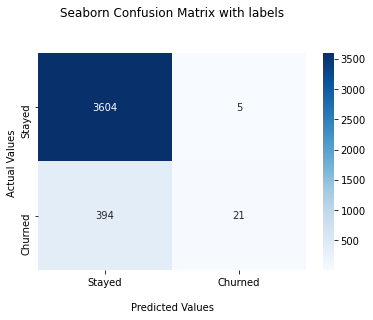

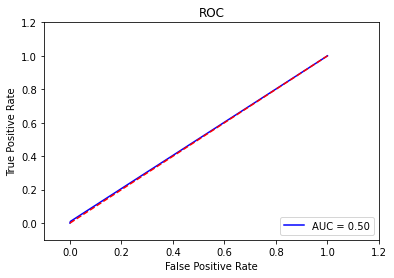

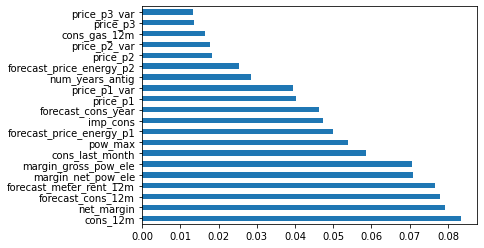

* KNN


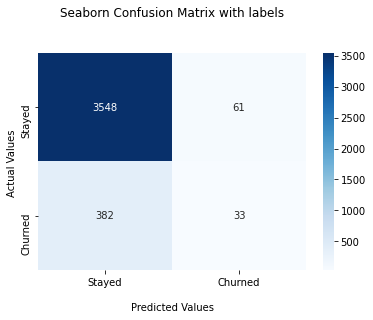

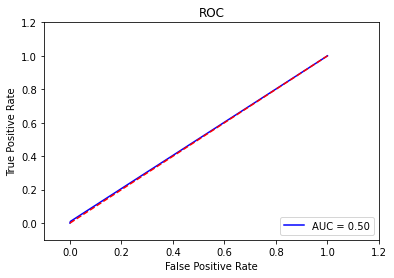

* Decision Tree


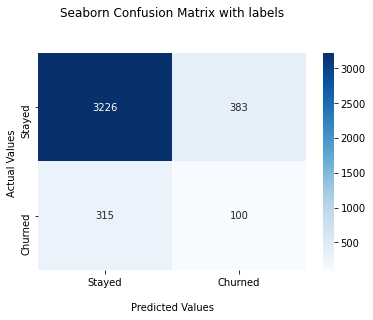

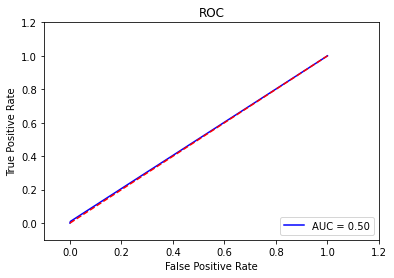

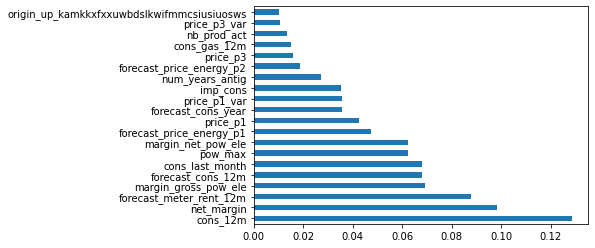

* XGB


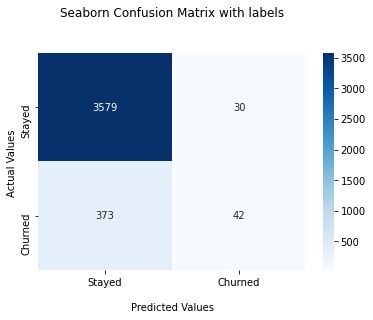

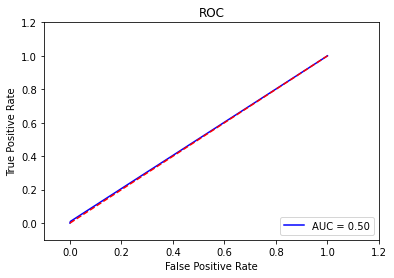

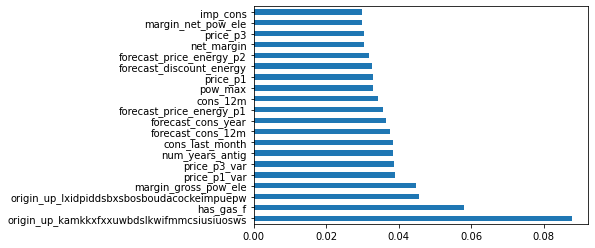

* Support Vector Machine


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


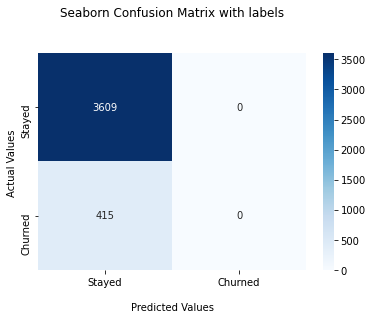

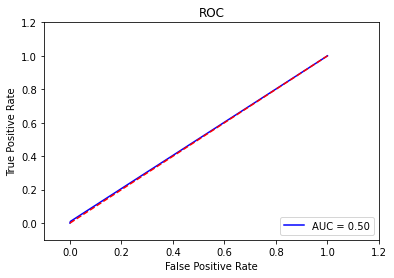

* LogisticRegression


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


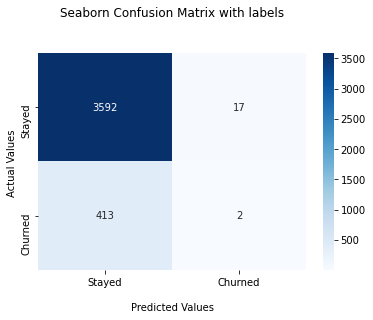

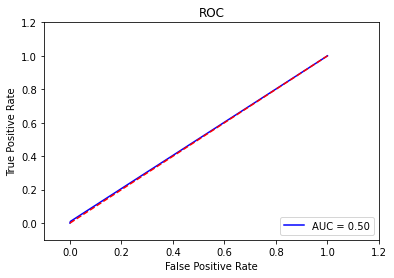

* Naive Bayes


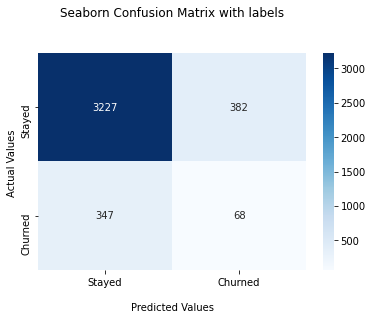

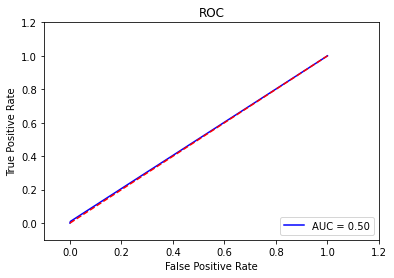

* Decision Tree


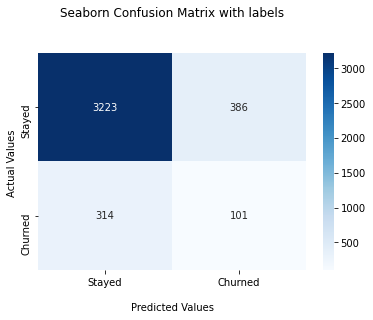

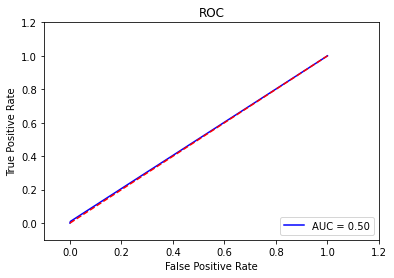

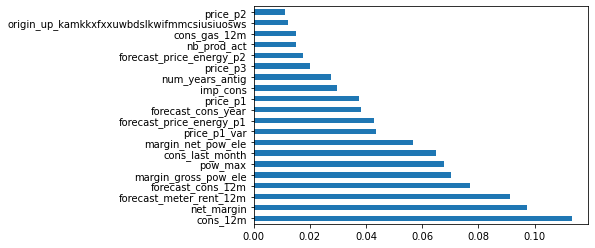

* AdaBoostClassifier


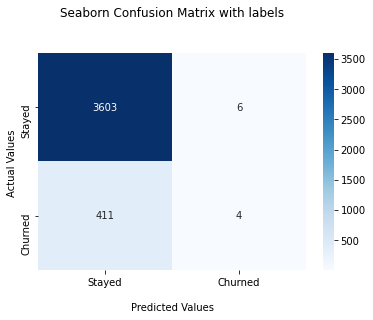

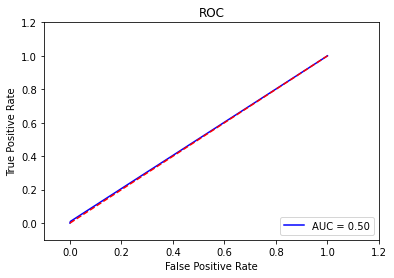

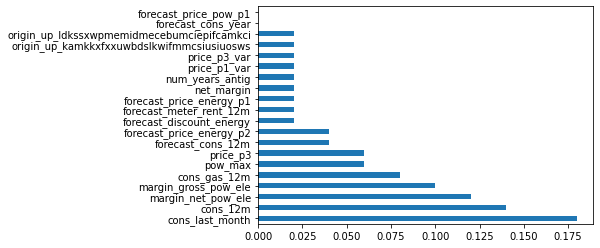

* GradientBoostingClassifier


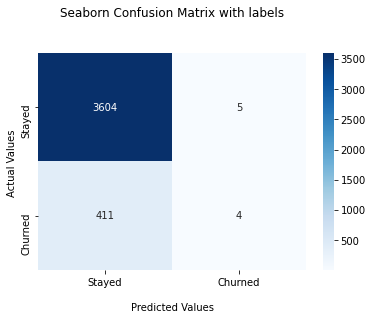

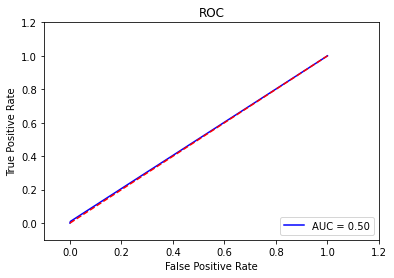

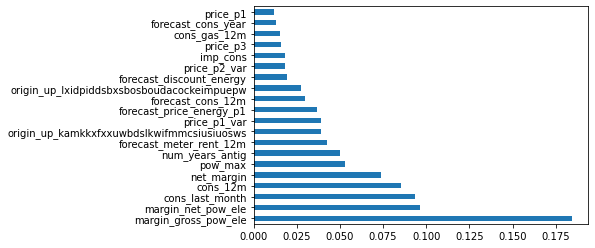

In [76]:
train_model(X_train, X_test, y_train,y_test,'plain')

In [58]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
import time
from sklearn.metrics import roc_curve, auc

  Classifier  Accuracy  Precision    Recall
0         DC  0.827783   0.210417  0.243373


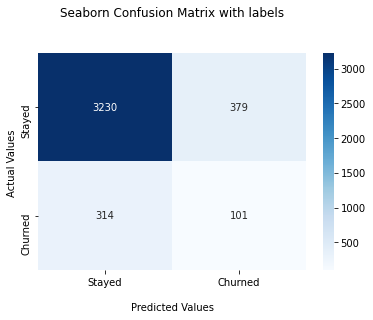

  Classifier  Accuracy  Precision    Recall
0        bag  0.899105    0.57377  0.084337


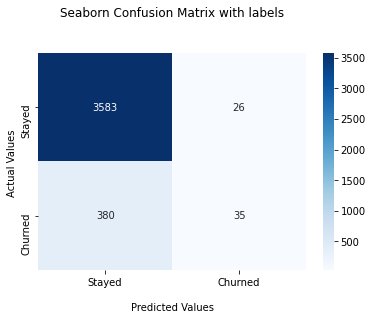

  Classifier  Accuracy  Precision    Recall
0        log  0.893141   0.105263  0.004819


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


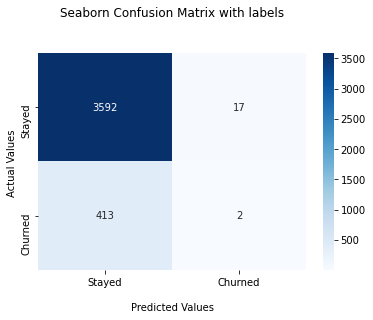

  Classifier  Accuracy  Precision    Recall
0         rf  0.900845   0.807692  0.050602


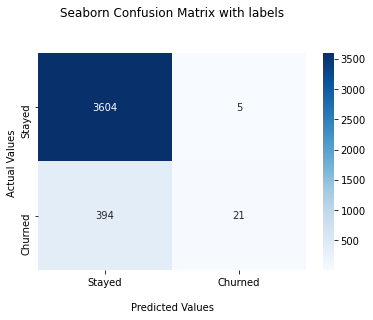

  Classifier  Accuracy  Precision    Recall
0        ada  0.900348   0.888889  0.038554


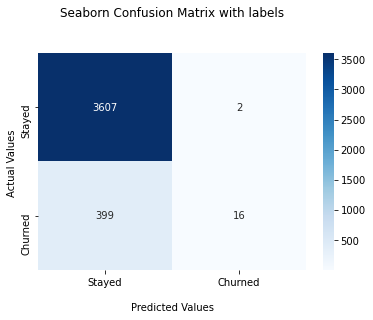

In [70]:
tc = DecisionTreeClassifier()
tc.fit(X_train,y_train)
evaluate('DC',tc, X_test, y_test)
plot_confunsion(tc)


bag = BaggingClassifier(base_estimator=tc)
bag.fit(X_train,y_train)
evaluate('bag',bag, X_test, y_test)
plot_confunsion(bag)

log = LogisticRegression()
log.fit(X_train,y_train)
evaluate('log',log, X_test, y_test)
plot_confunsion(log)

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
evaluate('rf',rf, X_test, y_test)
plot_confunsion(rf)

ada = AdaBoostClassifier(base_estimator=rf)
ada.fit(X_train,y_train)
evaluate('ada',ada, X_test, y_test)
plot_confunsion(ada)

In [60]:
start = time.time()

tc = DecisionTreeClassifier(max_depth=4)
tc.fit(X_train,y_train)

params = {'max_depth':[2,4,8]}

tcgrid = GridSearchCV(estimator=tc,param_grid=params,cv=5,scoring='accuracy')
tcgrid.fit(X_train,y_train)

end = time.time()
print(end-start)
start = time.time()

params = {'C':[0.01,0.1,1,10]}

loggrid = RandomizedSearchCV(estimator=log,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
loggrid.fit(X_train,y_train)

end = time.time()
print(end-start)
start = time.time()

rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train,y_train)

params = {'max_depth': [8, 16, 32], 'min_samples_leaf':[2, 4, 8]}

rfgrid = RandomizedSearchCV(estimator=rf,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
rfgrid.fit(X_train,y_train)

end = time.time()
print(end-start)
start = time.time()

bag = BaggingClassifier(base_estimator=tcgrid.best_estimator_,n_estimators=2)
bag.fit(X_train,y_train)

params = {'base_estimator':[tcgrid.best_estimator_,rfgrid.best_estimator_],'n_estimators':[2,3,4]}

baggrid = RandomizedSearchCV(estimator=bag,param_distributions=params,cv=5,scoring='accuracy',n_iter=3)
baggrid.fit(X_train,y_train)

end = time.time()
print(end-start)
start = time.time()

abc = AdaBoostClassifier(base_estimator=rfgrid.best_estimator_,n_estimators=4)
abc.fit(X_train,y_train)

params = {'base_estimator':[tcgrid.best_estimator_,rfgrid.best_estimator_],'n_estimators':[2,3,4]}

abcgrid = RandomizedSearchCV(estimator = abc, param_distributions= params, cv=5, scoring='accuracy',n_iter=3)
abcgrid.fit(X_train,y_train)

end = time.time()
print(end-start)

0.9749729633331299


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

1.9685280323028564
24.399399280548096
42.68314599990845
40.64634108543396


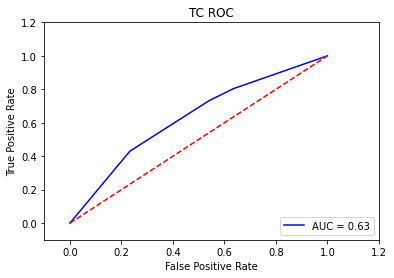

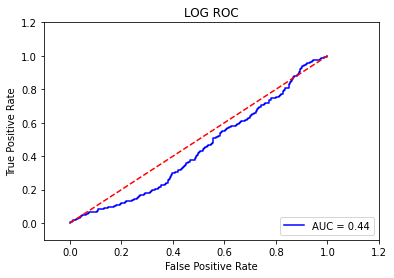

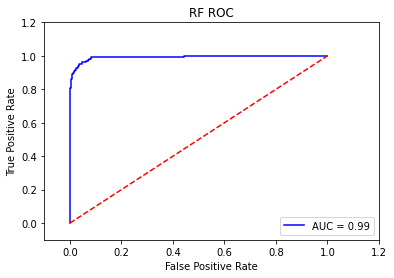

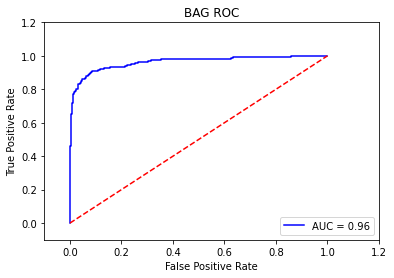

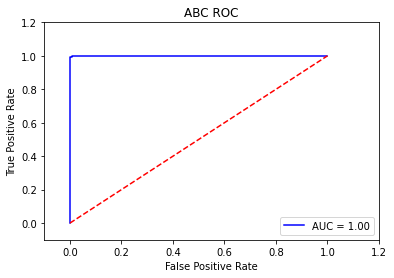

In [61]:
X_train_roc, X_test_roc,y_train_roc, y_test_roc = train_test_split(X_train,y_train,test_size=0.2,random_state=73)

actual = y_test_roc

y_pred = tcgrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('TC ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred = loggrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('LOG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred = rfgrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('RF ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred = baggrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('BAG ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred = abcgrid.predict_proba(X_test_roc)
predictions = y_pred[:,1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ABC ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [290]:
#### k-fold validation 

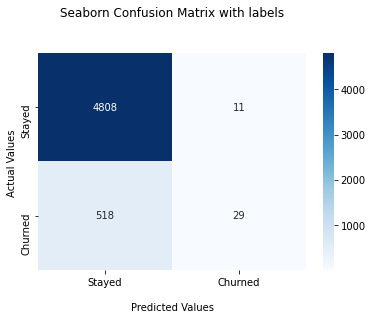

      Classifier  Accuracy  Precision    Recall
0  Random Forest  0.901416      0.725  0.053016


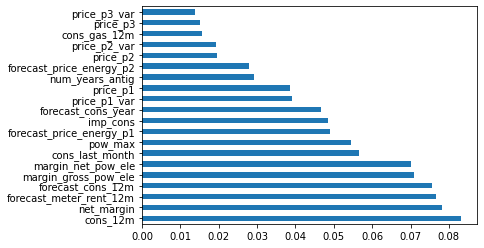

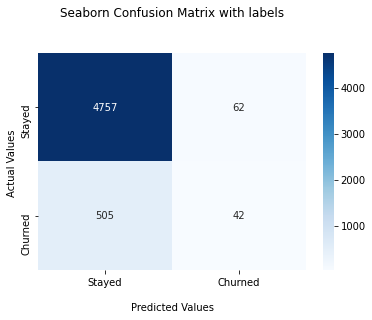

  Classifier  Accuracy  Precision    Recall
0        KNN  0.894335   0.403846  0.076782


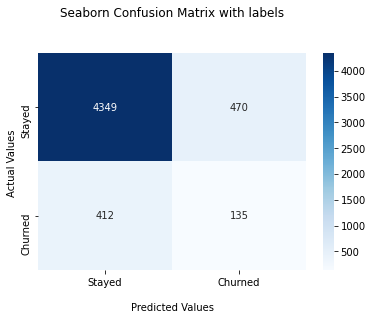

      Classifier  Accuracy  Precision    Recall
0  Decision Tree  0.835632    0.22314  0.246801


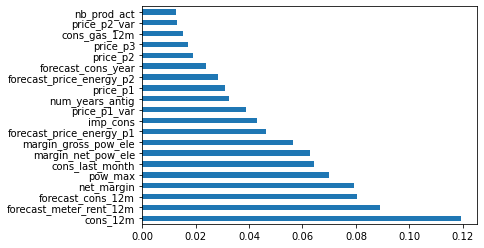

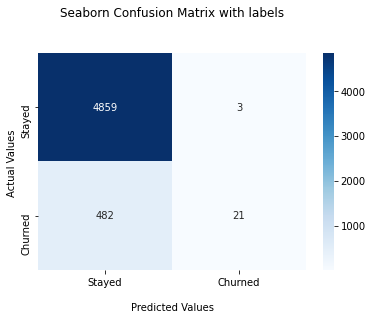

      Classifier  Accuracy  Precision   Recall
0  Random Forest  0.909599      0.875  0.04175


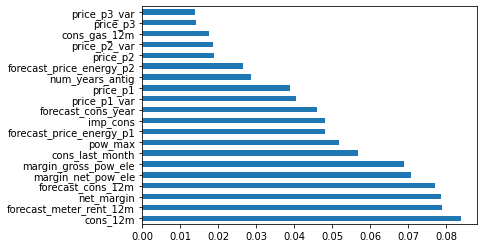

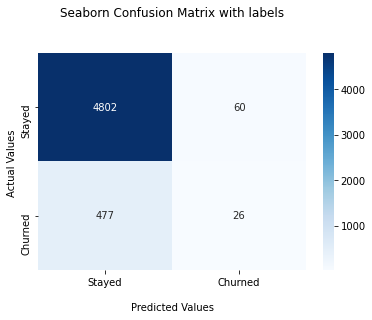

  Classifier  Accuracy  Precision   Recall
0        KNN  0.899907   0.302326  0.05169


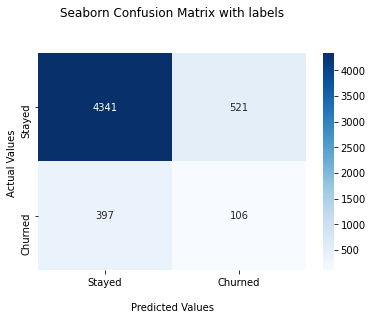

      Classifier  Accuracy  Precision    Recall
0  Decision Tree  0.828891   0.169059  0.210736


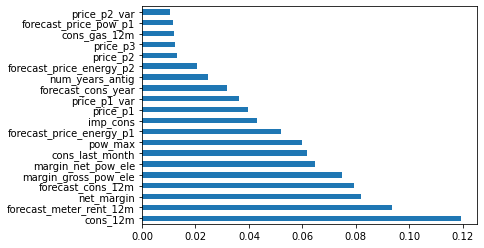

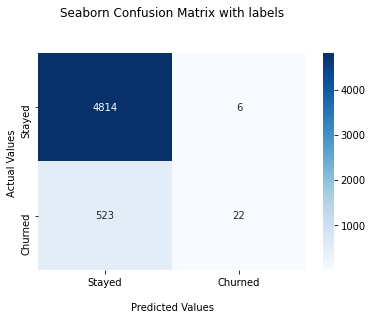

      Classifier  Accuracy  Precision    Recall
0  Random Forest  0.901398   0.785714  0.040367


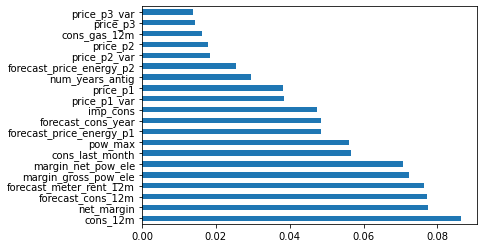

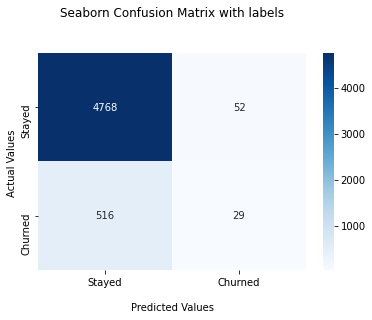

  Classifier  Accuracy  Precision    Recall
0        KNN  0.894129   0.358025  0.053211


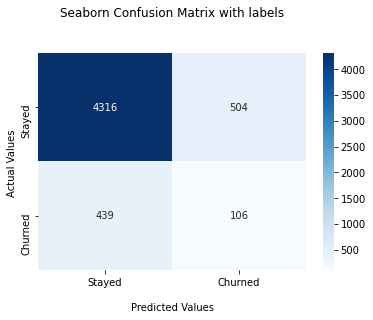

      Classifier  Accuracy  Precision    Recall
0  Decision Tree  0.824231    0.17377  0.194495


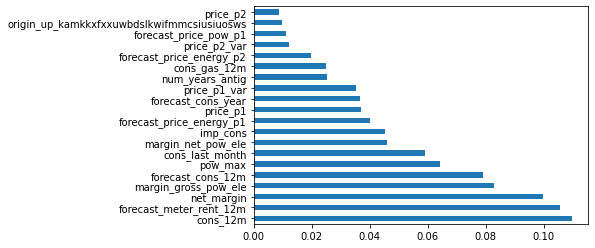

In [291]:
# k = 3
# kf = KFold(n_splits=k, random_state=None)
# from sklearn.model_selection import KFold 

    
# Classifiers=[["Random Forest",RandomForestClassifier()],
#              ['KNN',KNeighborsClassifier(5)],
#              ["Decision Tree",DecisionTreeClassifier()],
             
             
#              ["Support Vector Machine",SVC()],
#              ["LogisticRegression",LogisticRegression()],  
#              ["Naive Bayes",GaussianNB()],
#              ["Decision Tree",DecisionTreeClassifier()],
#              ["AdaBoostClassifier", AdaBoostClassifier()],
#             ["GradientBoostingClassifier", GradientBoostingClassifier()]
# ]


# for train_index , test_index in kf.split(X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train , y_test = y[train_index] , y[test_index]
    

#     for name,classifier in Classifiers:
#         classifier=classifier
#         classifier.fit(X_train,y_train)
#         y_pred = classifier.predict(X_test)


#         plot_confunsion(classifier)

#         evaluate(name,classifier, X_test, y_test)

#         try:
#             feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
#             feat_importances.nlargest(20).plot(kind='barh')
#             plt.show()
#         except:
#             pass
    

In [77]:
models

,model,run_time,Accuracy,Precision,Recall
0,Random Forest_plain,0.04,0.900845,0.807692,0.050602
1,KNN_plain,0.02,0.889911,0.351064,0.079518
2,Decision Tree_plain,0.0,0.826541,0.207039,0.240964
3,XGB_plain,0.01,0.899851,0.583333,0.101205
4,Support Vector Machine_plain,0.06,0.896869,0.000000,0.000000
5,LogisticRegression_plain,0.0,0.893141,0.105263,0.004819
6,Naive Bayes_plain,0.0,0.818837,0.151111,0.163855
7,Decision Tree_plain,0.0,0.826044,0.207392,0.243373
8,AdaBoostClassifier_plain,0.02,0.896372,0.400000,0.009639
9,GradientBoostingClassifier_plain,0.06,0.896620,0.444444,0.009639


In [78]:
### balance data 


from collections import Counter
from imblearn.over_sampling import SMOTE


SMOTE = SMOTE()

# 获得过采样后的样本
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# 统计过采样后的类别占比情况
print("After oversampling: ",Counter(y_train_SMOTE))





After oversampling:  Counter({0: 10892, 1: 10892})


* Random Forest


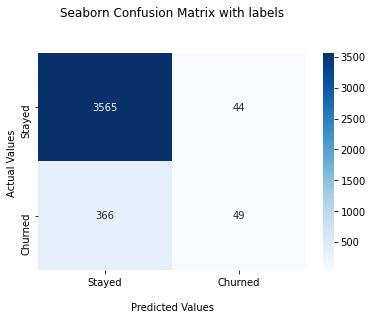

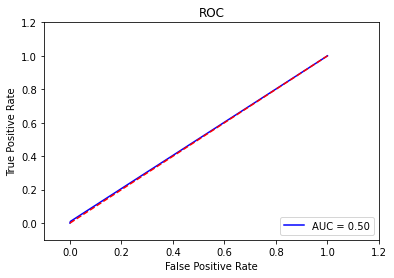

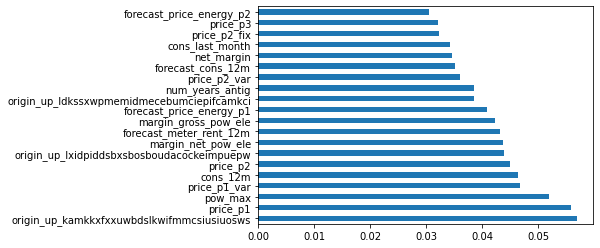

* KNN


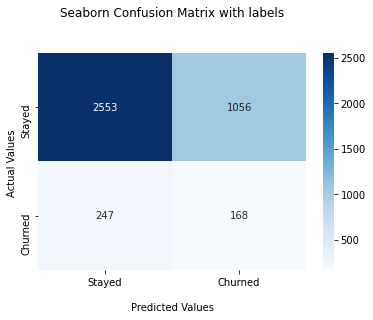

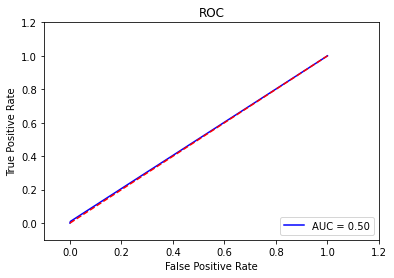

* Decision Tree


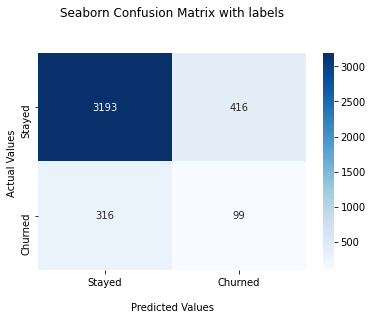

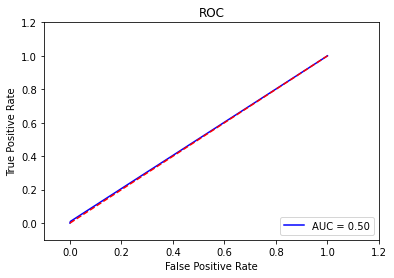

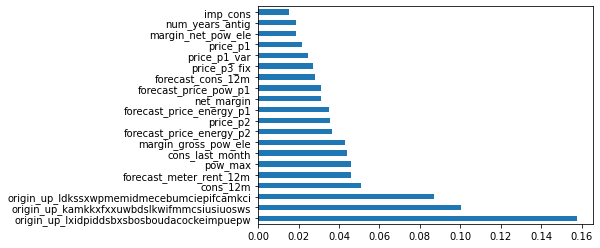

* XGB


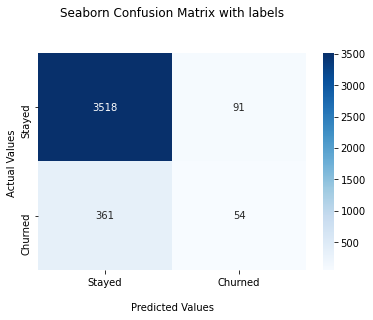

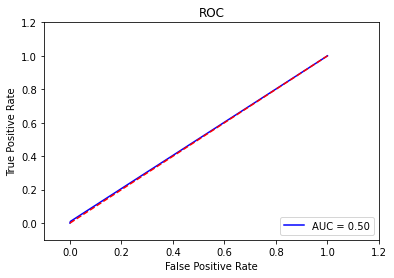

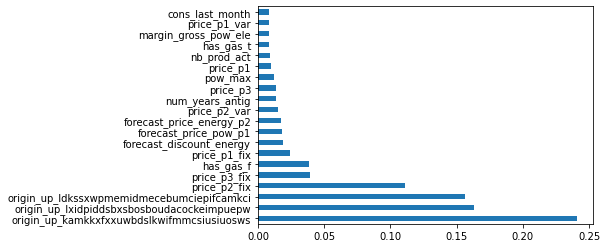

* Support Vector Machine


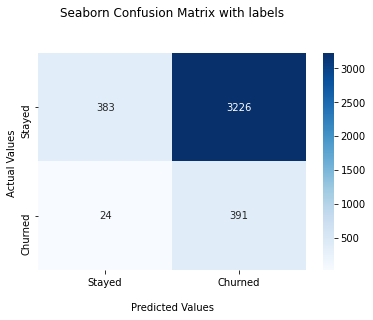

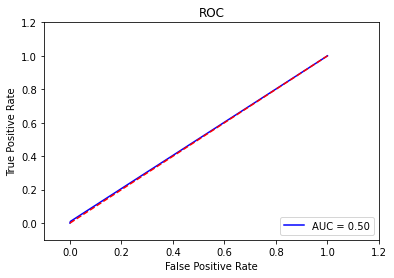

* LogisticRegression


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


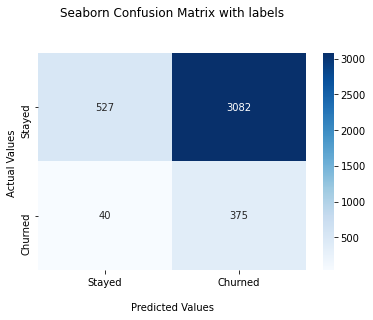

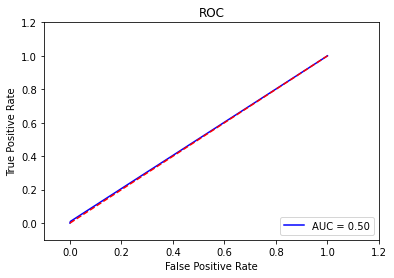

* Naive Bayes


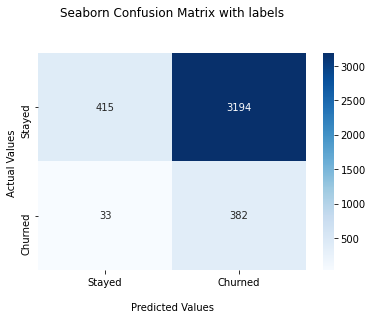

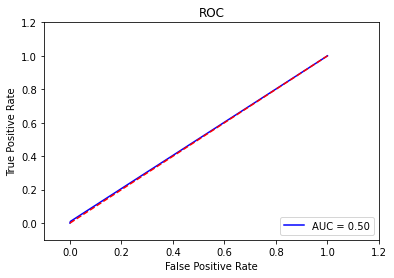

* Decision Tree


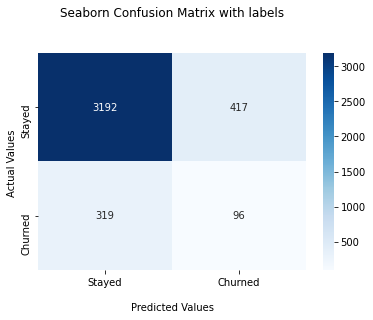

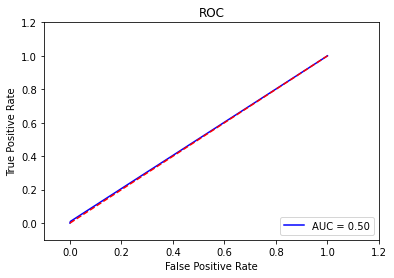

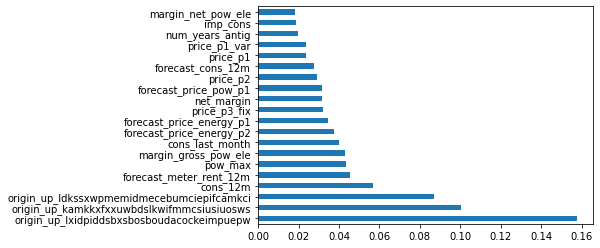

* AdaBoostClassifier


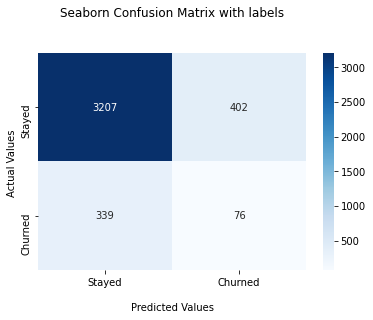

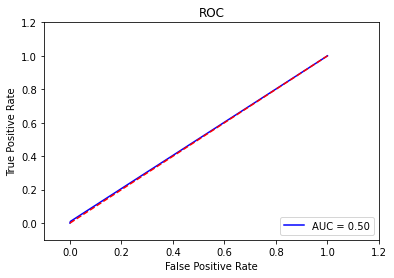

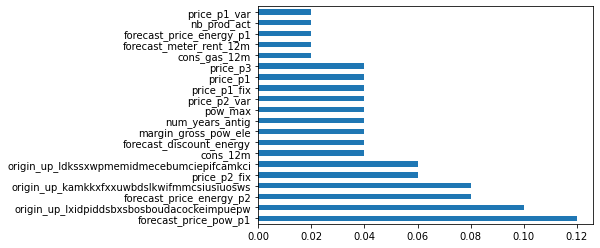

* GradientBoostingClassifier


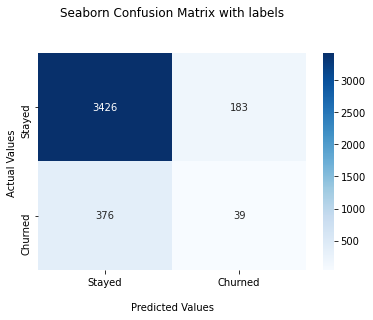

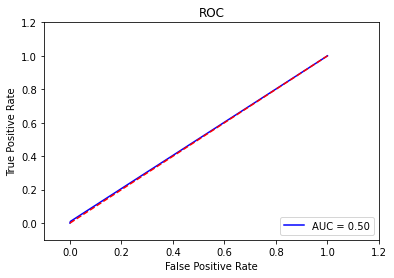

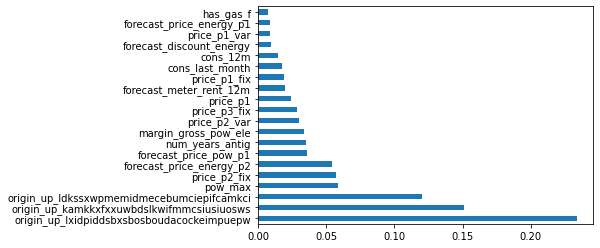

In [80]:
train_model(X_train_SMOTE, X_test, y_train_SMOTE,y_test,'balance')

In [81]:
models

,model,run_time,Accuracy,Precision,Recall
0,Random Forest_plain,0.04,0.900845,0.807692,0.050602
1,KNN_plain,0.02,0.889911,0.351064,0.079518
2,Decision Tree_plain,0.0,0.826541,0.207039,0.240964
3,XGB_plain,0.01,0.899851,0.583333,0.101205
4,Support Vector Machine_plain,0.06,0.896869,0.000000,0.000000
5,LogisticRegression_plain,0.0,0.893141,0.105263,0.004819
6,Naive Bayes_plain,0.0,0.818837,0.151111,0.163855
7,Decision Tree_plain,0.0,0.826044,0.207392,0.243373
8,AdaBoostClassifier_plain,0.02,0.896372,0.400000,0.009639
9,GradientBoostingClassifier_plain,0.06,0.896620,0.444444,0.009639
